Importing relevant functionalities

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kde
from pandas import DataFrame as df
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [2]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}k'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
     
    return new_tick_format

Preparing plots

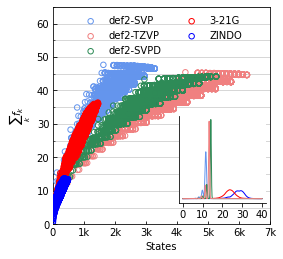

In [3]:
SVPD = pd.read_csv('../csv_files/Nele_Nstates_sumfk_SVPD.csv',header=0)
SVP = pd.read_csv('../csv_files/Nele_Nstates_sumfk_SVP.csv',header=0)
M321G = pd.read_csv('../csv_files/Nele_Nstates_sumfk_321G.csv',header=0)
ZINDO = pd.read_csv('../csv_files/Nele_Nstates_sumfk_ZINDO.csv',header=0)
TZVP = pd.read_csv('../csv_files/Nele_Nstates_sumfk_TZVP.csv',header=0)

ZINDO_dev = abs(ZINDO.sum_f_k[:] - ZINDO.N_ele[:])
ZINDO_dens = kde.gaussian_kde(ZINDO_dev)
M321G_dev = abs(M321G.sum_f_k[:] - M321G.N_ele[:])
M321G_dens = kde.gaussian_kde(M321G_dev)
SVPD_dev = abs(SVPD.sum_f_k[:] - SVPD.N_ele[:])
SVPD_dens = kde.gaussian_kde(SVPD_dev)
SVP_dev = abs(SVP.sum_f_k[:] - SVP.N_ele[:])
SVP_dens = kde.gaussian_kde(SVP_dev)
TZVP_dev = abs(TZVP.sum_f_k[:] - TZVP.N_ele[:])
TZVP_dens = kde.gaussian_kde(TZVP_dev)

x = np.linspace(0,40,500)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()
ax.set_box_aspect(1)
ax.tick_params(direction="in",which='both')
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter('{x:.0f}')

ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));
ax.grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)


ax.scatter(SVP.N_states[:],SVP.sum_f_k[:],label='def2-SVP',s=30, facecolors='none', edgecolors='cornflowerblue',zorder=3,linewidths=1.0)
ax.scatter(TZVP.N_states[:],TZVP.sum_f_k[:],label='def2-TZVP',s=30, facecolors='none', edgecolors='lightcoral',zorder=3,linewidths=1.0)
ax.scatter(SVPD.N_states[:],SVPD.sum_f_k[:],label='def2-SVPD',s=30, facecolors='none', edgecolors='seagreen',zorder=3,linewidths=1.0)
ax.scatter(M321G.N_states[:],M321G.sum_f_k[:],label='3-21G',s=30, facecolors='none', edgecolors='red',zorder=3,linewidths=1.0)
ax.scatter(ZINDO.N_states[:],ZINDO.sum_f_k[:],label='ZINDO',s=30, facecolors='none', edgecolors='blue',zorder=3,linewidths=1.0)

ax.set_xlabel('States', fontsize = 10)
ax.set_ylabel('$\\sum_k f_k$',fontsize = 10) 
ax.set_ylim(0,65)
ax.set_xlim(0,7000)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.58,0.1,0.4,0.4])
ax2.set_axes_locator(ip)

plt.yticks([])
ax2.plot(x, ZINDO_dens(x), label='ZINDO',color='blue',zorder=3,linewidth=1.0)
ax2.plot(x, M321G_dens(x), label='3-21G',color='red',zorder=3,linewidth=1.0)
ax2.plot(x, SVP_dens(x), label='def2-SVP',color='cornflowerblue',zorder=3,linewidth=1.0)
ax2.plot(x, SVPD_dens(x), label='def2-SVPD',color='seagreen',zorder=3,linewidth=1.0)
ax2.plot(x, TZVP_dens(x), label='def2-TZVP',color='lightcoral',zorder=3,linewidth=1.0)
rs=ax2.spines["right"]
to=ax2.spines["top"]
rs.set_visible(False)
to.set_visible(False)
ax2.set_xticks(np.arange(min(x),max(x)+1,10.0))
ax.legend(frameon=False, loc='upper center',ncol=2)
plt.savefig("sumfk_states.pdf",bbox_inches='tight')
plt.show()

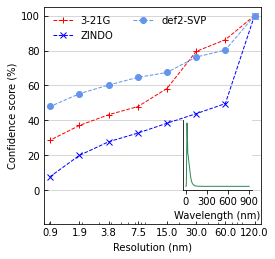

In [4]:
bins = ['001','002','004','008','016','032','064','128']
# ref
SVPD_method = {}
TZVP_method = {}
#ref_sum = np.zeros([8,12880])
for i in range(len(bins)):
    SVPD_method[i] = pd.read_csv('../csv_files/method_resolution/'+'SVPD'+'_nbin_'+bins[i]+'.csv',header=None)
    TZVP_method[i] = pd.read_csv('../csv_files/method_resolution/'+'TZVP'+'_nbin_'+bins[i]+'.csv',header=None)
    
M321G_method = {}
ZINDO_method = {}
SVP_method = {}
x= np.zeros(len(bins))
for i in range(len(bins)):
    x[i] = 120.0/float(bins[i])

fig, ax = plt.subplots()
ax.set_box_aspect(1)
ax.tick_params(direction="in",which='both')
ax.grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
ax.set_xlim([0.8,140])
ax.set_ylim([-19.47,105])
ax.set_xscale('log')
ax.set_xticks(x,minor=False)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
ax.set_xlabel('Resolution (nm)')
ax.set_ylabel('Confidence score (%)')

y= np.zeros(len(bins))

for i in range(len(bins)):
    M321G_method[i] = pd.read_csv('../csv_files/method_resolution/'+'321G'+'_nbin_'+bins[i]+'.csv',header=None)
    j = len(M321G_method[i].columns)
    j1 = 0.0
    for j in range(len(M321G_method[i].columns)):
        j1 += sum(abs(SVPD_method[i].iloc[:,j] - M321G_method[i].iloc[:,j]))
        #j1 += sum(abs(TZVP_method[i].iloc[:,j] - M321G_method[i].iloc[:,j]))
        
    x[i] = 120.0/float(bins[i])
    y[i] = 100*(1.0 - (j1/12880))
ax.plot(x,y,label='3-21G',color='red',zorder=3,linewidth=1.0,linestyle='--',marker='+')
for i in range(len(bins)):
    ZINDO_method[i] = pd.read_csv('../csv_files/method_resolution/'+'ZINDO'+'_nbin_'+bins[i]+'.csv',header=None)
    j1 = 0.0
    for j in range(len(ZINDO_method[i].columns)):
        j1 += sum(abs(SVPD_method[i].iloc[:,j] - ZINDO_method[i].iloc[:,j]))
        #j1 += sum(abs(TZVP_method[i].iloc[:,j] - ZINDO_method[i].iloc[:,j]))
    #print('ZINDO_method',j+1, j1/12880,120.0/float(bins[i]), 100*(1.0 - (j1/12880)))
    x[i] = 120.0/float(bins[i])
    y[i] = 100*(1.0 - (j1/12880))
ax.plot(x,y,label='ZINDO',color='blue',zorder=3,linewidth=1.0,linestyle='--',marker='x')

for i in range(len(bins)):
    SVP_method[i] = pd.read_csv('../csv_files/method_resolution/'+'SVP'+'_nbin_'+bins[i]+'.csv',header=None)
    j1 = 0.0
    for j in range(len(SVP_method[i].columns)):
        j1 += sum(abs(SVPD_method[i].iloc[:,j] - SVP_method[i].iloc[:,j]))
        #j1 += sum(abs(TZVP_method[i].iloc[:,j] - SVP_method[i].iloc[:,j]))
    #print('SVP_method',j+1, j1/12880,120.0/float(bins[i]), 100*(1.0 - (j1/12880)))
    x[i] = 120.0/float(bins[i])
    y[i] = 100*(1.0 - (j1/12880))
ax.plot(x,y,label='def2-SVP',color='cornflowerblue',zorder=3,linewidth=1.0,linestyle='--',marker='o')

ax.legend(frameon=False, loc='upper left',ncol=2)

SVPD_nm = pd.read_csv('../csv_files/SVPD_nm_shuf.csv',header=0)

x1 = np.linspace(0,900,500)
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.64,0.16,0.32,0.32])
ax2.set_axes_locator(ip)

plt.yticks([])

SVPD_nm_dens = kde.gaussian_kde(SVPD_nm.v2[:])
ax2.plot(x1, SVPD_nm_dens(x1), color='seagreen',zorder=1,linewidth=1.0) #label='def2-SVPD',
rs=ax2.spines["right"]
to=ax2.spines["top"]
rs.set_visible(False)
to.set_visible(False)
ax2.set_xticks(np.arange(min(x1),max(x1)+1,300.0))
ax2.set_xlabel('Wavelength (nm)', fontsize = 10)

plt.savefig("confidence_res.pdf",bbox_inches='tight')
#plt.legend(frameon=False, loc='upper left',ncol=2)
plt.show()

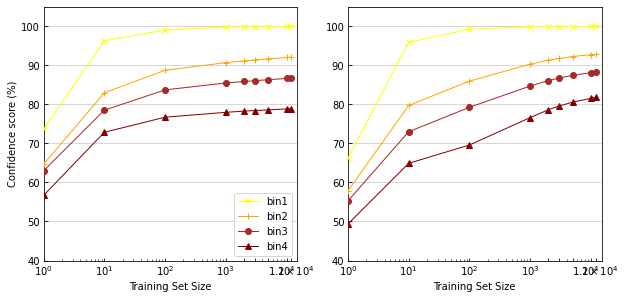

In [31]:
SLATM_method = {}
FCHL_method = {}
SLATM_method = pd.read_csv('../csv_files/ML_results/ML_results_confscore_SLATM.csv',header=0)
FCHL_method = pd.read_csv('../csv_files/ML_results/ML_results_confscore_FCHL.csv',header=0)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x1 = SLATM_method.training_set[:]
ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)
ax[0].set_xscale('log')
ax[0].set_xticks(x1,minor=False)
ax[0].set_xlabel('Training Set Size')
ax[0].set_ylabel('Confidence score (%)')
ax[0].tick_params(direction="in",which='both')
ax[0].set_xlim([1,15000])
ax[0].set_ylim([40,105])

ax[1].set_xscale('log')
ax[1].set_xticks(x1,minor=False)
ax[1].set_xlabel('Training Set Size')
ax[1].tick_params(direction="in",which='both')
ax[1].set_xlim([1,15000])
ax[1].set_ylim([40,105])
ax[0].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
ax[1].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
ax[0].plot(SLATM_method.training_set[:],SLATM_method.bin1[:],label='bin1',color='yellow',zorder=3,linewidth=1.0,linestyle='-',marker='x')
ax[0].plot(SLATM_method.training_set[:],SLATM_method.bin2[:],label='bin2',color='orange',zorder=3,linewidth=1.0,linestyle='-',marker='+')
ax[0].plot(SLATM_method.training_set[:],SLATM_method.bin3[:],label='bin3',color='brown',zorder=3,linewidth=1.0,linestyle='-',marker='o')
ax[0].plot(SLATM_method.training_set[:],SLATM_method.bin4[:],label='bin4',color='maroon',zorder=3,linewidth=1.0,linestyle='-',marker='^')
ax[0].legend(frameon=True, loc='lower right',ncol=1)
ax[1].plot(FCHL_method.training_set[:],FCHL_method.bin1[:],label='bin1',color='yellow',zorder=3,linewidth=1.0,linestyle='-',marker='x')
ax[1].plot(FCHL_method.training_set[:],FCHL_method.bin2[:],label='bin2',color='orange',zorder=3,linewidth=1.0,linestyle='-',marker='+')
ax[1].plot(FCHL_method.training_set[:],FCHL_method.bin3[:],label='bin3',color='brown',zorder=3,linewidth=1.0,linestyle='-',marker='o')
ax[1].plot(FCHL_method.training_set[:],FCHL_method.bin4[:],label='bin4',color='maroon',zorder=3,linewidth=1.0,linestyle='-',marker='^')
plt.savefig("SLATM_FCHL.pdf",bbox_inches='tight')
